In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve


In [2]:
import sys
import time
import numpy as np
from nose.tools import ok_, eq_
from numpy.testing import assert_almost_equal
import kirilenko_en_practical2 as model


def test_python3():
    ok_(sys.version_info > (3, 3))


def check_shape(**kwargs):
    np.random.seed(42)
    H, W, K = 10, 12, 20
    h, w = 4, 5
    max_iter = 1
    X = np.random.rand(H, W, K)
    F, B, s, A, LL = model.run_EM(X, h, w, max_iter=max_iter, **kwargs)
    eq_(F.shape, (h, w))
    eq_(B.shape, (H, W))
    eq_(A.shape, (H-h+1, W-w+1))
    eq_(np.array(LL).shape, (max_iter,))


def generate_data(H, W, K, h, w, use_MAP=False, seed=42):
    # explicit data with no noise
    np.random.seed(seed)
    X = np.zeros((H, W, K))
    F = np.zeros((h, w))
    B = np.random.rand(H, W)

    coords = []
    q = np.zeros((H-h+1, W-w+1, K))
    for k in range(K):
        x = np.random.randint(0, H-h+1)
        y = np.random.randint(0, W-w+1)
        coords.append((x, y))
        X[:, :, k] = np.copy(B)
        X[x:x+h, y:y+w, k] = F
        q[x, y, k] = 1.

    A = np.random.rand(H - h + 1, W - w + 1)
    A /= A.sum()

    if use_MAP:
        q = np.array(coords).T

    return X, F, B, A, q


def check_e_step(use_MAP=False):
    H, W, K = 4, 5, 2
    h, w = 2, 3
    s = 1e-1
    X, F, B, A, q = \
        generate_data(H, W, K, h, w, use_MAP=use_MAP)

    pred_q = model.run_e_step(X, F, B, s, A, use_MAP=use_MAP)
    if use_MAP:
        assert_almost_equal(q, pred_q)
    else:
        assert_almost_equal(q, pred_q, 5)


def check_m_step(use_MAP=False):
    H, W, K = 7, 8, 2
    h, w = 2, 3
    X, F, B, A, q = generate_data(H, W, K, h, w, use_MAP=use_MAP)

    pred_F, pred_B, pred_s, pred_A = \
        model.run_m_step(X, q, h, w, use_MAP=use_MAP)

    assert_almost_equal(F, pred_F)
    assert_almost_equal(B, pred_B)


def check_e_step_time(use_MAP=False):
    H, W, K = 50, 100, 50
    h, w = 40, 50
    s = 0.1
    X, F, B, A, q = generate_data(H, W, K, h, w)
    t_start = time.perf_counter()
    model.run_e_step(X, F, B, s, A, use_MAP=use_MAP)
    computation_time = time.perf_counter() - t_start
    assert computation_time < 1


def check_m_step_time(use_MAP=False):
    H, W, K = 50, 100, 50
    h, w = 40, 50
    X, F, B, A, q = generate_data(H, W, K, h, w, use_MAP=use_MAP)

    t_start = time.perf_counter()
    model.run_m_step(X, q, h, w, use_MAP=use_MAP)
    computation_time = time.perf_counter() - t_start
    assert computation_time < 1


def test_output_shape():
    check_shape()
    check_shape(use_MAP=True)


def test_e_step():
    check_e_step()
    check_e_step(use_MAP=True)


def test_m_stap():
    check_m_step()
    check_m_step(use_MAP=True)


def test_e_step_time():
    check_e_step_time()
    check_e_step_time(use_MAP=True)


def test_m_step_time():
    check_m_step_time()
    check_m_step_time(use_MAP=True)

In [3]:
images = np.load("data_shad19_1000.npy")

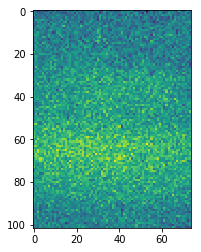

In [5]:
plt.imshow(F)

In [4]:
images = np.load("data_shad19_1000.npy")

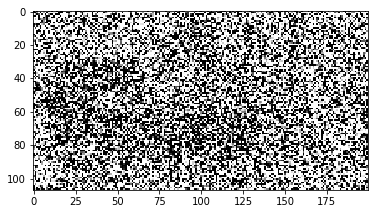

In [18]:
plt.imshow(images[:,:,0],cmap='Greys')

In [19]:
images.shape

(107, 200, 1000)

In [146]:
w = 74
h = 102
F, B, s, A, L = run_EM_with_restarts(images, h, w, max_iter=1000, tolerance=0.001, n_restarts=20)

In [148]:
L

-14982937.056125235

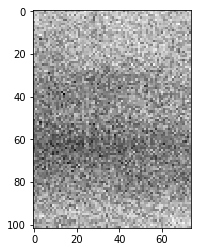

In [147]:
plt.imshow(F,cmap='Greys')

## Генерация данных

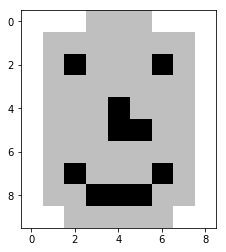

In [4]:
face = np.array([
    [100,100,100,160,160,160,100,100,100],
    [100,160,160,160,160,160,160,160,100],
    [100,160,250,160,160,160,250,160,100],
    [100,160,160,160,160,160,160,160,100],
    [100,160,160,160,250,160,160,160,100],
    [100,160,160,160,250,250,160,160,100],
    [100,160,160,160,160,160,160,160,100],
    [100,160,250,160,160,160,250,160,100],
    [100,160,160,250,250,250,160,160,100],
    [100,100,160,160,160,160,160,100,100],
])
face[face==160]=180
face[face==100]=140
plt.imshow(face, cmap='Greys')

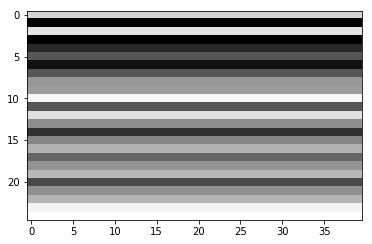

In [5]:
H = 25
W = 40
backgound = np.zeros((H, W))
rand_column = np.random.randint(low=0, high=230, size=H)
backgound = np.tile(rand_column, (W,1)).T

plt.imshow(backgound, cmap='Greys')

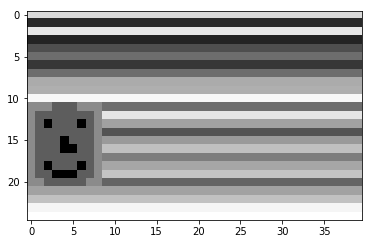

In [6]:
def generate_imgs(bg, face, noise=0):
    bg_copy = np.copy(bg)
    face_shape = face.shape
    bg_shape = bg.shape
    x = np.random.choice( bg_shape[0]-face_shape[0])
    y = np.random.choice( bg_shape[1]-face_shape[1])
    bg_copy[x:x+face_shape[0], y:y+face_shape[1]] = face
    res = np.around(bg_copy+np.random.normal(scale=noise, size=bg_shape))
    res[res>255] = 255
    res[res<0] = 0
    return res
plt.imshow(generate_imgs(backgound, face,0), cmap="Greys")

In [7]:
H = 25
W = 40
w = 9
h = 10

In [8]:
# plot_img(B)
def generate_dataset(size = 100, s=100):
    X = []
    for i in range(size):
        data = generate_imgs(backgound, face, s)
        X.append(data)
    X = np.einsum("kij->ijk", np.array(X))
    return X

In [9]:
X = []
for i in range(300):
    data = generate_imgs(backgound, face, 100)
    X.append(data)
X = np.einsum("kij->ijk", np.array(X))

In [10]:
X.shape

(25, 40, 300)

## 1

restart number =  0


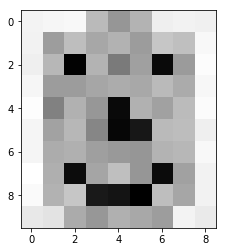

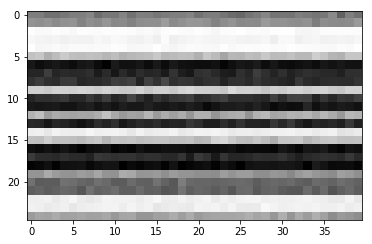

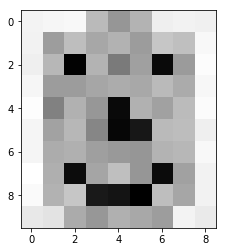

In [21]:
F, B, s, A, L = model.run_EM_with_restarts(X, 10, 9, max_iter=100, n_restarts=1)
plt.imshow(F, cmap="Greys")

In [11]:
L_log = []
B_log = []
F_log = []
s_log = []
A_log = []
np.random.seed(41)
for i in range(30):
    F, B, s, A, L = model.run_EM_with_restarts(X, 10, 9, max_iter=40, use_MAP=False, n_restarts=1) 
    L_log.append(L)
    F_log.append(F)
    B_log.append(B)
    s_log.append(s)
    A_log.append(A)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


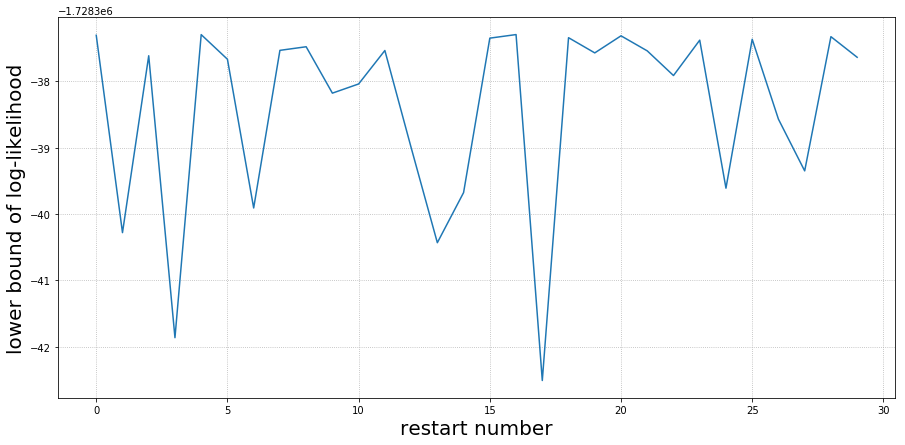

In [16]:
plt.figure(figsize=(15, 7))
plt.plot(np.arange(30), L_log)
plt.grid(ls=':')
plt.xlabel('restart number', fontsize=20)
plt.ylabel('lower bound of log-likelihood', fontsize=20)
plt.show()

In [23]:
L_log = []
B_log = []
F_log = []
s_log = []
A_log = []
np.random.seed(41)
for i in range(30):
    F, B, s, A, L = model.run_EM_with_restarts(X[:,:,:100], 10, 9, max_iter=40, use_MAP=False, n_restarts=1) 
    L_log.append(L)
    F_log.append(F)
    B_log.append(B)
    s_log.append(s)
    A_log.append(A)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


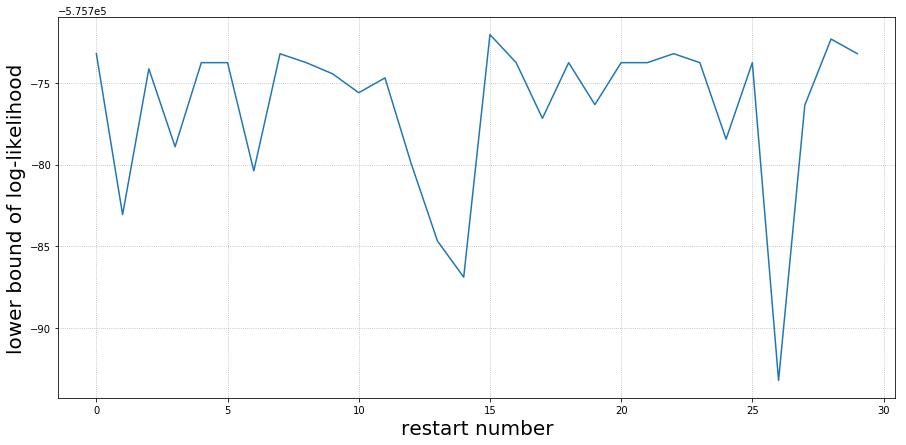

In [24]:
plt.figure(figsize=(15, 7))
plt.plot(np.arange(30), L_log)
plt.grid(ls=':')
plt.xlabel('restart number', fontsize=20)
plt.ylabel('lower bound of log-likelihood', fontsize=20)
plt.show()

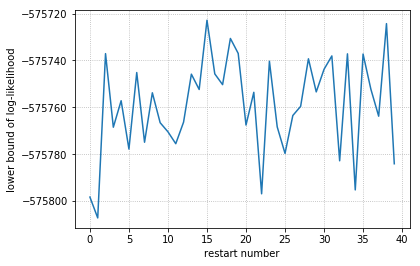

In [234]:
plt.plot(np.arange(3-), L_log)
plt.grid(ls=':')
plt.xlabel('restart number')
plt.ylabel('lower bound of log-likelihood')
plt.show()

In [22]:
np.argsort(L_log)[-10 * 0-1], np.argsort(L_log)[-10 * 1-1], np.argsort(L_log)[-10 * 2-1]

(16, 7, 26)

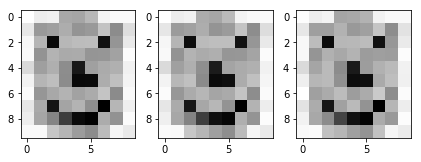

In [20]:
plt.figure(figsize=(7, 10))
for i in range(3):
    plt.subplot('23%d'%(i+4))
    index = np.argsort(L_log)[-10 * i-1]
    plt.imshow(F_log[index], cmap="Greys")

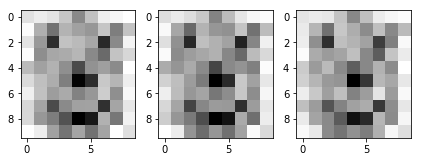

In [29]:
plt.figure(figsize=(7, 10))
for i in range(3):
    plt.subplot('23%d'%(i+4))
    index = np.argsort(L_log)[-10 * i-1]
    plt.imshow(F_log[index], cmap="Greys")

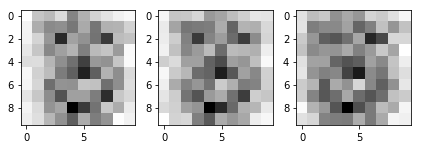

In [240]:
plt.figure(figsize=(7, 10))
for i in range(3):
    plt.subplot('23%d'%(i+4))
    index = np.argsort(L_log)[-i-1]
    plt.imshow(F_log[index], cmap="Greys")

In [247]:
X = generate_dataset(size=100, s=500)
L_log = []
B_log = []
F_log = []
s_log = []
A_log = []
np.random.seed(41)
for i in range(15):
    F, B, s, A, L = run_EM(X, 10, 10, max_iter=30, use_MAP=False) 
    L_log.append(L)
    F_log.append(F)
    B_log.append(B)
    s_log.append(s)
    A_log.append(A)

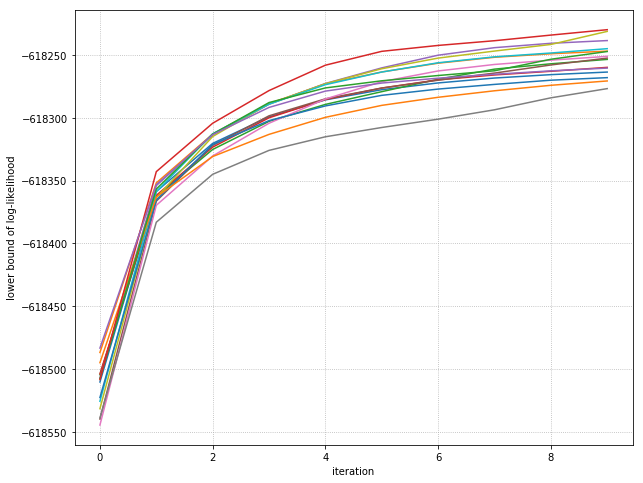

In [254]:
plt.figure(figsize=(10, 8))
for i in range(15):
    plt.plot(np.arange(10), np.array(L_log[i])[:10])
    
plt.grid(ls=':')
plt.xlabel('iteration')
plt.ylabel('lower bound of log-likelihood')
plt.show()

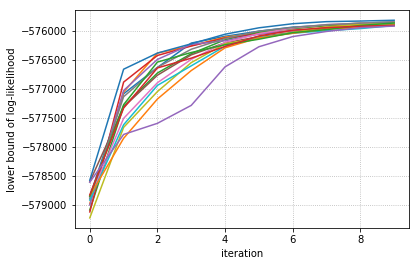

In [245]:
for i in range(15):
    plt.plot(np.arange(10), np.array(L_log[i])[:10])
    
plt.grid(ls=':')a
plt.xlabel('iteration')
plt.ylabel('lower bound of log-likelihood')
plt.show()

## 2

In [257]:
from tqdm import tqdm
Ls = dict()
for s in tqdm([10, 20, 50, 100, 500, 1000]):
    for K in [2, 10, 50, 100, 1000]:
        X = generate_dataset(size=K, s=s)
        F, B, s_new, A, L = run_EM_with_restarts(X, 10, 9, max_iter=50, use_MAP=False, n_restarts=20) 
        Ls[(s, K)] = L

 17%|█▋        | 1/6 [17:29<1:27:26, 1049.22s/it]/Users/elkir/.virtualenvs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:191: RuntimeWarning: divide by zero encountered in true_divide
/Users/elkir/.virtualenvs/py3.6/lib/python3.6/site-packages/scipy/signal/signaltools.py:391: RuntimeWarning: invalid value encountered in multiply
  ret = (np.fft.irfftn(sp1 * sp2, fshape)[fslice].copy())
100%|██████████| 6/6 [2:14:12<00:00, 1287.50s/it]


In [263]:
Ls

{(6.873518022090293, 2): -6694.6154805563,
 (6.361549486177169, 10): -32715.130958788228,
 (6.166670298216447, 50): -162097.70683758083,
 (6.065865650855211, 100): -322611.0060965632,
 (5.975326531728961, 1000): -3212451.9576658923,
 (14.250833308968321, 2): -8152.894126424939,
 (13.130962703013735, 10): -39962.14124793815,
 (12.661520260527398, 50): -198065.357296885,
 (12.281715140289668, 100): -393153.05192689894,
 (11.990486474181596, 1000): -3908914.3827049225,
 (34.3090112069701, 2): -9910.079434914656,
 (30.63052265397306, 10): -48432.38102463081,
 (28.882455154556123, 50): -239304.24394491303,
 (27.396898570094155, 100): -473382.965758809,
 (26.12716929406697, 1000): -4687798.204830669,
 (52.834836992272436, 2): -10773.604890102059,
 (45.336405302078006, 10): -52353.5147708616,
 (41.31596609440235, 50): -257204.97848562035,
 (38.21499177873283, 100): -506666.06933996186,
 (35.78291707072394, 1000): -5002298.029105885,
 (79.92919835704596, 2): -11601.545805320588,
 (61.785660601

(6.873518022090293, 2) -6694.6154805563
(14.250833308968321, 2) -8152.894126424939
(34.3090112069701, 2) -9910.079434914656
(52.834836992272436, 2) -10773.604890102059
(79.92919835704596, 2) -11601.545805320588
(79.42227175043534, 2) -11588.821019881161
(6.361549486177169, 10) -32715.130958788228
(13.130962703013735, 10) -39962.14124793815
(30.63052265397306, 10) -48432.38102463081
(45.336405302078006, 10) -52353.5147708616
(61.785660601086875, 10) -55449.12426729768
(62.44976883567849, 10) -55554.65023823727
(6.166670298216447, 50) -162097.70683758083
(12.661520260527398, 50) -198065.357296885
(28.882455154556123, 50) -239304.24394491303
(41.31596609440235, 50) -257204.97848562035
(54.02705649206036, 50) -270616.772322886
(54.61199196986682, 50) -271152.3956768202
(6.065865650855211, 100) -322611.0060965632
(12.281715140289668, 100) -393153.05192689894
(27.396898570094155, 100) -473382.965758809
(38.21499177873283, 100) -506666.06933996186
(48.492887779006246, 100) -530481.6812030952


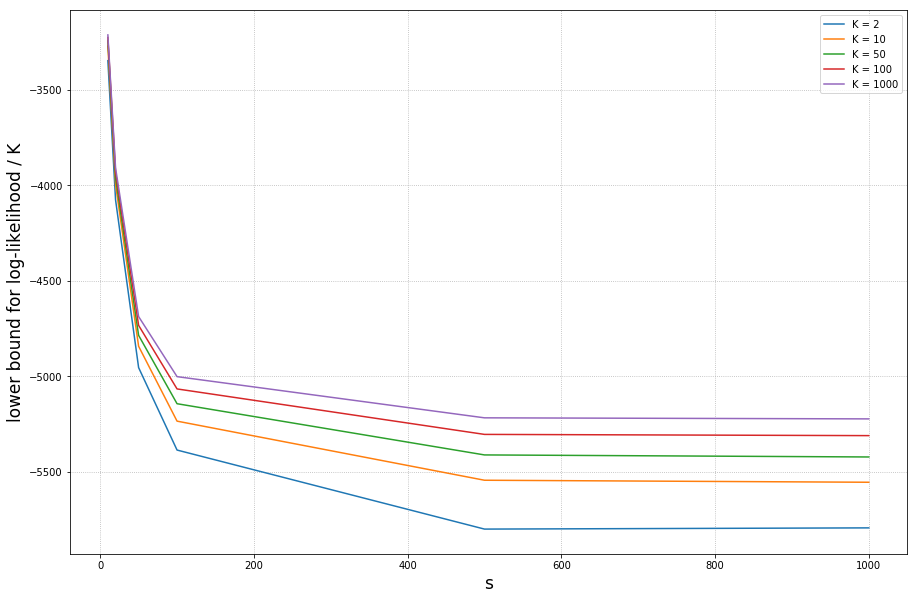

In [86]:
new_Ls = dict()
plt.figure(figsize=(15, 10))
for K in [2, 10, 50, 100, 1000]:
    arr_s = []
    for elem in Ls:
        if elem[1] == K:
            arr_s.append(Ls[elem])
            print(elem, Ls[elem])
    plt.plot([10, 20, 50, 100, 500, 1000], np.array(arr_s) / K, label='K = ' + str(K))
#     for i, ss in enumerate([10, 20, 50, 100, 500, 1000]):
#         new_Ls[(ss, K)] = arr_s[i]
        
plt.grid(ls=':')
plt.xlabel('s', fontsize=17)
plt.ylabel('lower bound for log-likelihood / K', fontsize=17)
plt.legend()
plt.show()

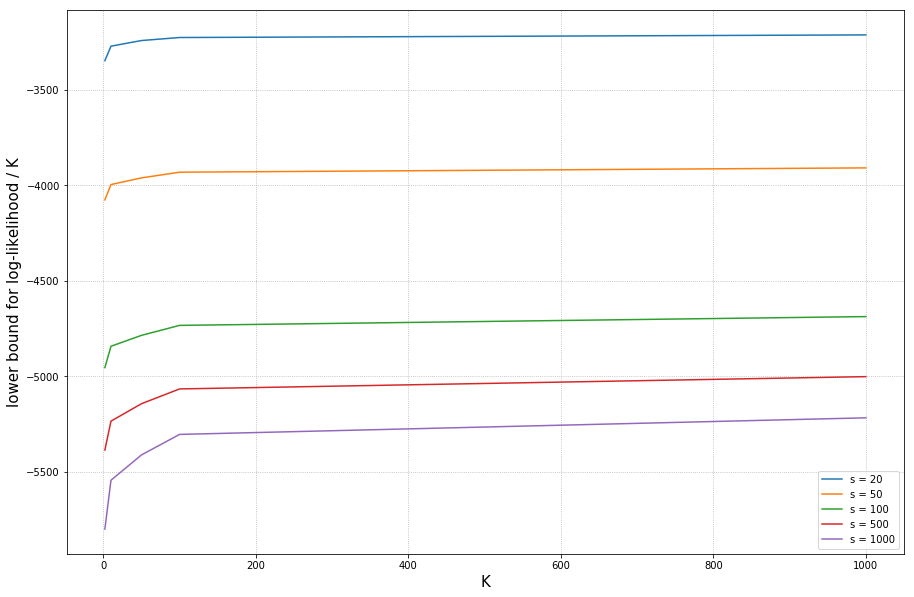

In [85]:
plt.figure(figsize=(15, 10))

plt.plot(np.array([2, 10, 50, 100, 1000]), np.array(ss20) / np.array([2, 10, 50, 100, 1000]), label='s = ' + str(20))
plt.plot(np.array([2, 10, 50, 100, 1000]), np.array(ss50) / np.array([2, 10, 50, 100, 1000]), label='s = ' + str(50))
plt.plot(np.array([2, 10, 50, 100, 1000]), np.array(ss100) / np.array([2, 10, 50, 100, 1000]), label='s = ' + str(100))
plt.plot(np.array([2, 10, 50, 100, 1000]), np.array(ss500) / np.array([2, 10, 50, 100, 1000]), label='s = ' + str(500))
plt.plot(np.array([2, 10, 50, 100, 1000]), np.array(ss1000) / np.array([2, 10, 50, 100, 1000]), label='s = ' + str(1000))
plt.grid(ls=':')
plt.xlabel('K', fontsize=15)
plt.ylabel('lower bound for log-likelihood / K', fontsize=15)
plt.legend()
plt.show()

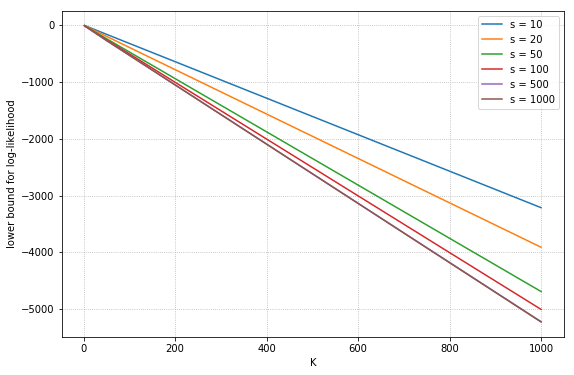

In [277]:
plt.figure(figsize=(9, 6))
for ss in [10, 20, 50, 100, 500, 1000]:
    arr_K = []
    for K in [2, 10, 50, 100, 1000]:
        arr_K.append(new_Ls[(ss, K)])
        
    plt.plot([2, 10, 50, 100, 1000], np.array(arr_K) / K, label='s = ' + str(ss))
plt.grid(ls=':')
plt.xlabel('K')
plt.ylabel('lower bound for log-likelihood')
plt.legend()
plt.show()

## 3 Сравнение с hard-EM


In [92]:
import time

#Your statements here

ss = 10

# X = generate_dataset(size=10, s=s)
start = time.time()
for i in range(20):
    F, B, s, A, L = model.run_EM_with_restarts(X[:,:,:10], 10, 9, max_iter=50, use_MAP=False, n_restarts=1) 
    
stop = time.time()
print((stop - start))

4.759430885314941


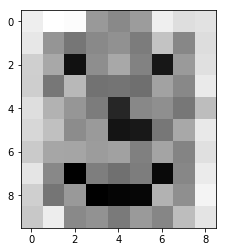

In [94]:
# X = generate_dataset(size=10, s=s)
F, B, s, A, L = model.run_EM_with_restarts(X[:,:,:200], 10, 9, max_iter=100, n_restarts=5)
plt.imshow(F, cmap="Greys")

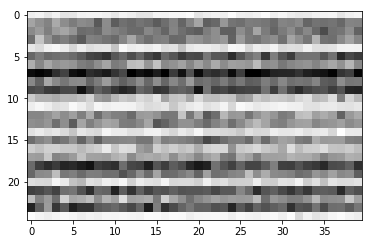

In [336]:
plt.imshow(B, cmap="Greys")

In [318]:
X = generate_dataset(size=100, s=ss)
F, B, s, A, L = run_EM_with_restarts(X, 10, 9, max_iter=50, use_MAP=False, n_restarts=1) 

In [319]:
X = generate_dataset(size=100, s=ss)
start = time.time()
for i in tqdm(range(30)):
    F, B, s, A, L = run_EM_with_restarts(X, 10, 10, max_iter=50, use_MAP=False, n_restarts=1) 
    
stop = time.time()
print((stop - start))


100%|██████████| 30/30 [09:28<00:00, 17.10s/it]


568.9713971614838


In [324]:
F, B, s, A, L = run_EM_with_restarts(X, 10, 9, max_iter=100, n_restarts=10)

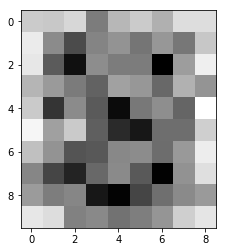

In [332]:
plt.imshow(F, cmap="Greys")

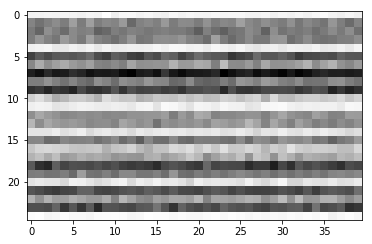

In [333]:
plt.imshow(B, cmap="Greys")

In [338]:
X = generate_dataset(size=10, s=ss)
start = timeit.default_timer()
for i in range(30):
    F, B, s, A, L = run_EM_with_restarts(X, 10, 9, max_iter=50, use_MAP=True, n_restarts=1) 
stop = timeit.default_timer()
print((stop - start))

1.789124761999119


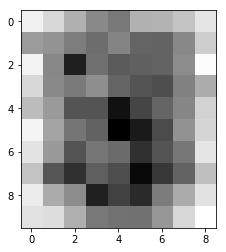

In [19]:
X = []
for i in range(500):
    data = generate_imgs(backgound, face, 100)
    X.append(data)
X = np.einsum("kij->ijk", np.array(X))

F, B, s, A, L = model.run_EM_with_restarts(X, 10, 9, max_iter=500, use_MAP=True, n_restarts=15)
plt.imshow(F, cmap="Greys")

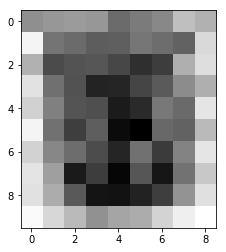

In [14]:
F, B, s, A, L = model.run_EM_with_restarts(X[:,:,:300], 10, 9, max_iter=1000, use_MAP=True, n_restarts=15)
plt.imshow(F, cmap="Greys")

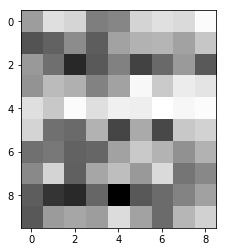

In [343]:
F, B, s, A, L = run_EM_with_restarts(X, 10, 9, max_iter=100, use_MAP=True, n_restarts=10) 
plt.imshow(F, cmap="Greys")

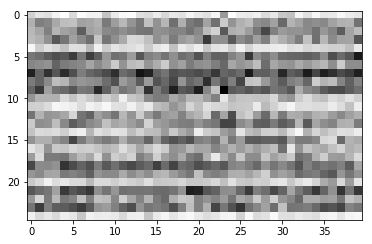

In [344]:
plt.imshow(B, cmap="Greys")

In [346]:
X = generate_dataset(size=100, s=s)
start = timeit.default_timer()
for i in range(30):
    F, B, s, A, L = run_EM_with_restarts(X, 10, 9, max_iter=50, use_MAP=True, n_restarts=1) 
    
stop = timeit.default_timer()
print((stop - start))

46.429998113017064


In [ ]:
true, 100 : 46.429998113017064 / 30
true, 10 : 1.789124761999119 / 30 

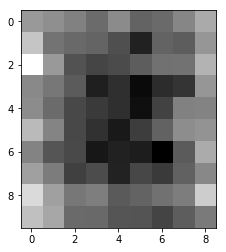

In [348]:
F, B, s, A, L = run_EM_with_restarts(X, 10, 9, max_iter=100, use_MAP=True, n_restarts=10) 
plt.imshow(F, cmap="Greys")

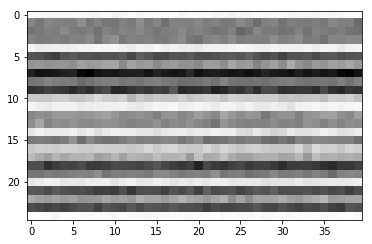

In [349]:
plt.imshow(B, cmap="Greys")

## 4

restart number =  0


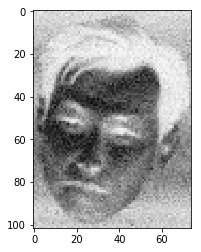

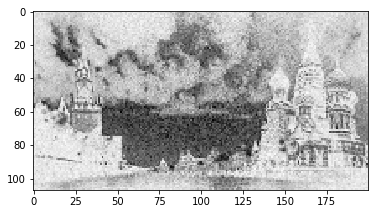

In [24]:
#1000
np.random.seed(41)
H, W, K = images.shape
w = 74
h = 102
F, B, s, A, L = run_EM_with_restarts(images, h, w, max_iter=10000, tolerance=0.0005, n_restarts=1)

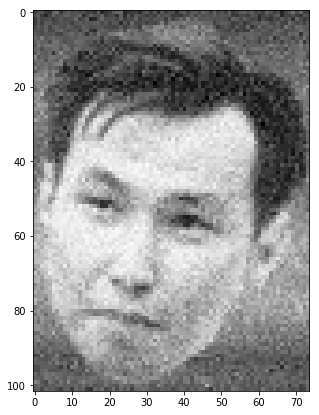

In [33]:
plt.figure(figsize=(17, 7))
plt.imshow(255 - F, cmap="Greys")

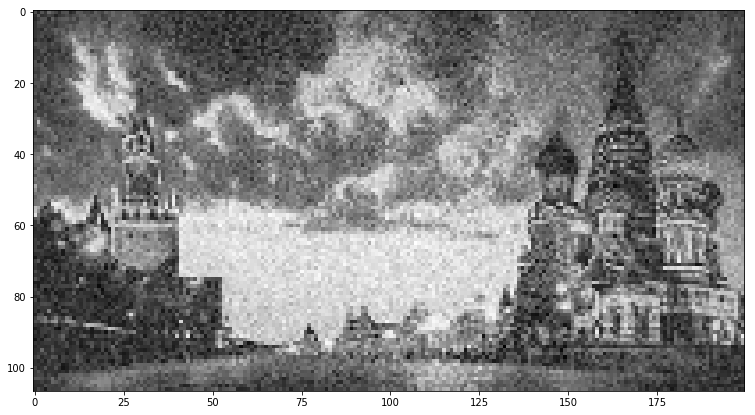

In [34]:
plt.figure(figsize=(17, 7))
plt.imshow(255 - B, cmap="Greys")

In [21]:
#500
images = np.load("data_shad19_500.npy")
np.random.seed(41)
H, W, K = images.shape
w = 74
h = 102
F, B, s, A, L = model.run_EM_with_restarts(images, h, w, max_iter=10000, tolerance=0.0005, n_restarts=1)

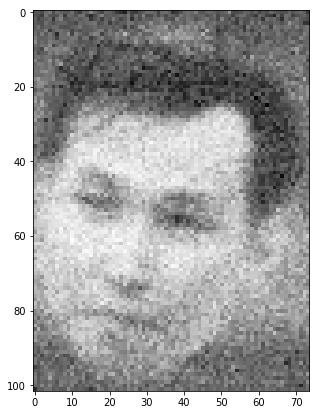

In [22]:
plt.figure(figsize=(17, 7))
plt.imshow(255 - F, cmap="Greys")

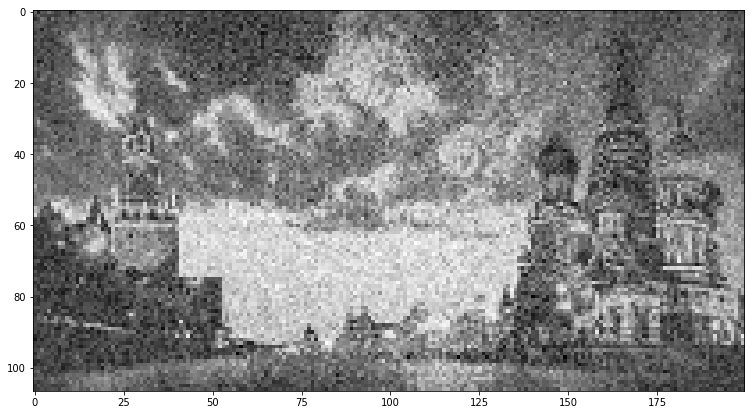

In [23]:
plt.figure(figsize=(17, 7))
plt.imshow(255 - B, cmap="Greys")

In [24]:
#300
images = np.load("data_shad19_300.npy")
np.random.seed(41)
H, W, K = images.shape
w = 74
h = 102
F, B, s, A, L = model.run_EM_with_restarts(images, h, w, max_iter=10000, tolerance=0.0005, n_restarts=1)

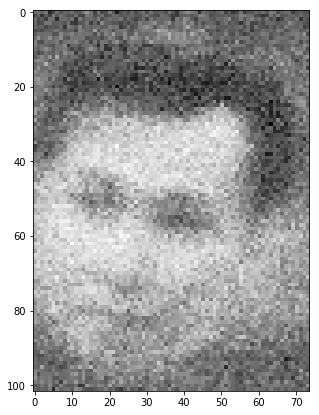

In [25]:
plt.figure(figsize=(17, 7))
plt.imshow(255 - F, cmap="Greys")

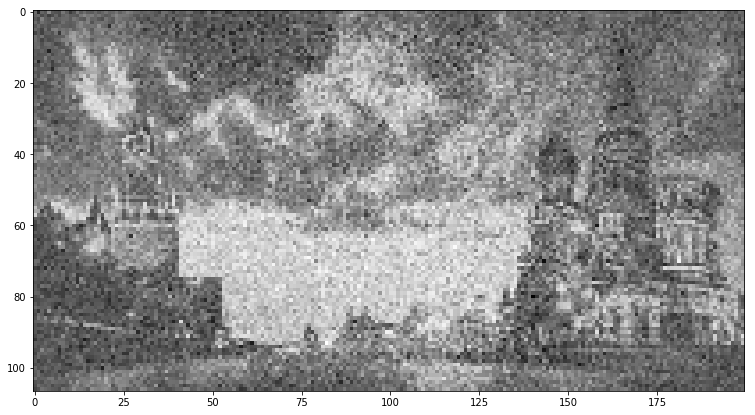

In [26]:
plt.figure(figsize=(17, 7))
plt.imshow(255 - B, cmap="Greys")

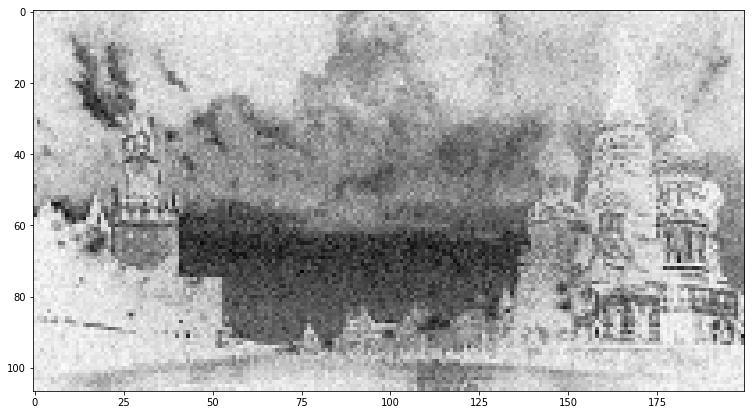

In [38]:
images = np.load("data_shad19_1000.npy")
plt.figure(figsize=(15, 7))
plt.imshow(np.mean(images, axis=-1), cmap="Greys")

In [34]:
np.mean(images, axis=-1)[:,:,None].shape

(107, 200, 1)

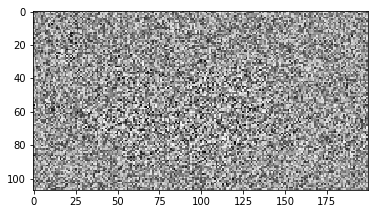

In [37]:
face_noised = images - np.mean(images, axis=-1)[:,:,None]
# face_noised.mean(axis=-1)
plt.imshow(face_noised.mean(axis=-1), cmap="Greys")

In [27]:
#100
images = np.load("data_shad19_100.npy")
np.random.seed(41)
H, W, K = images.shape
w = 74
h = 102
F, B, s, A, L = model.run_EM_with_restarts(images, h, w, max_iter=10000, tolerance=0.0005, n_restarts=1)

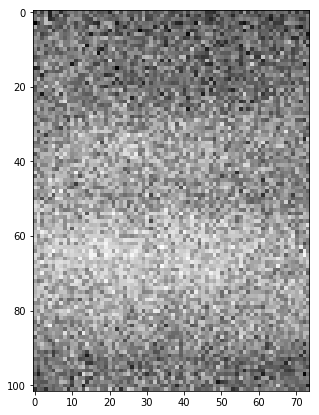

In [28]:
plt.figure(figsize=(17, 7))
plt.imshow(255 - F, cmap="Greys")

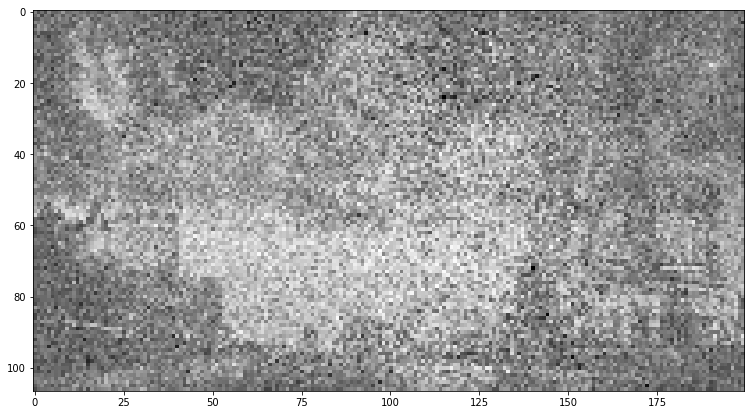

In [29]:
plt.figure(figsize=(17, 7))
plt.imshow(255 - B, cmap="Greys")